# Social Network Analysis_Ego_Network_Facebook _Machine_Learning_Predicting_Friendships

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statistics import mean

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from math import exp

### Degree Centrality 

#### Assumption: important nodes have many connections.
#### The most basic measure of centrality: number of neighbors.

In [3]:
def degree_centrality(G1):
    #Code to figure out the person who has the biggest number of neighbors 
    maximum = 0 
    node = 0
    degree_centrality = nx.degree_centrality(G1)
    for i in G1.nodes() : 
        if (degree_centrality[i]> maximum)  : 
            maximum = degree_centrality[i]
            node = i 
    #print(node)
    return node 

In [4]:
def top_percent_degree_centrality(G1 , per = 0.02):
    degree_centrality = nx.degree_centrality(G1)

    lis=[]
    dic = dict(degree_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

###  Closeness centrality

#### Assumption: important nodes are close to other nodes.

In [5]:
def closeness_centrality(G1):
    maximum = 0 
    node = 0
    closeness_centrality = nx.closeness_centrality(G1)
    for i in G1.nodes() : 
        if closeness_centrality[i]> maximum  : 
            maximum = closeness_centrality[i]
            node = i 
    #print(node)
    return node 

In [6]:
def top_percent_closeness_centrality(G1 , per = 0.02 ):
    closeness_centrality = nx.closeness_centrality(G1)

    lis=[]
    dic = dict(closeness_centrality)

    #Top percent of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_closeness=lis
    #print(lis_closeness)
    return lis_closeness

### Betweenness Centrality

#### Assumption: important nodes connect other nodes.

In [7]:
def betweenness_centrality(G1):
    maximum = 0 
    node = 0
    betweenness_centrality = nx.betweenness_centrality(G1)
    for i in G1.nodes() : 
        if betweenness_centrality[i]> maximum  : 
            maximum = betweenness_centrality[i]
            node = i 
    #print(node)
    return node 

In [8]:
def top_percent_betweenness_centrality(G1 , per = 0.02):
    betweenness_centrality = nx.betweenness_centrality(G1)

    lis=[]
    dic = dict(betweenness_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_betweenness=lis
    #print(lis_betweenness)
    return lis_betweenness

### Functions about influency 

In [9]:
def polyvalent_influence (list1,list2,list3) :
    # Considering a person is a polyvalent influencer if he is among the top percent in the three classifications 
    
    return [x for x in list1 if x in list2 and x in list3]

In [10]:
def list_of_components (components) : 
    # list of lists where each list contain nodes of a single component 
    
    list_of_components=[]
    count = 0
    for com in components :
        list_nodes=list(com)
        list_of_components.append(list_nodes)
    
    return list_of_components

In [11]:
# function to calculate the avg of the three parameters of centrality for the k th community 

def extracting_graph_community (k,list_of_communities,numpy_matrix): 
    sample_array = np.array(numpy_matrix)

    list_edges_community_k = []
    for i in range(sample_array.shape[0]): 
        if sample_array[i][0] in list_of_communities[k] : 
            if sample_array[i][1] in list_of_communities[k] : 
                list_edges_community_k.append([sample_array[i][0],sample_array[i][1]])
            
    # creating an array of the k th community 
    sample_array=np.array(list_edges_community_k)

    # creating the G_sample graph of the k th community 
    
    # Instantiate the graph
    G_sample = nx.Graph()
    # add node/edge pairs
    G_sample.add_edges_from(sample_array)
    
    degree_centrality = nx.degree_centrality(G_sample)
    closeness_centralirty = nx.closeness_centrality(G_sample)
    betweenness_centrality = nx.betweenness_centrality(G_sample)
    
    avg_degree = mean(degree_centrality.values())
    avg_closeness = mean(closeness_centralirty.values())
    avg_betweenness = mean(betweenness_centrality.values())
    
    
    radius = nx.radius(G_sample)
    diameter = nx.diameter(G_sample)
    avg_shortest_path = nx.average_shortest_path_length(G_sample)
        
    
    
    smallest_bridge_number = nx.node_connectivity(G_sample)
    
    return (avg_degree,avg_closeness,avg_betweenness,radius,diameter,smallest_bridge_number,avg_shortest_path)

### Graph functions

In [12]:
def draw_graph (G_sample):
    # draw the network G1
    pos=nx.spring_layout(G_sample)
    fig= plt.figure(figsize=(20,10))
    nx.draw_networkx(G_sample,pos,with_labels=False,node_size=50,node_color='b',edge_color='Gray',alpha=0.9)
    return 

In [13]:
def color_nodes (G_sample,list) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    for node in G_sample.nodes() :
        if node in list :
            color_map.append('red')
        else: color_map.append('blue')
    fig= plt.figure(figsize=(18,14))
    nx.draw(G_sample,node_color = color_map,with_labels=False,node_size=18,edge_color='Gray',alpha=0.8)
    plt.show()

In [14]:
def color_list_of_nodes_in_graph (list1 , list2 , G ,node_size=40) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=40,edge_color='Gray',alpha=0.9)
    plt.show()

In [15]:
def color_list_of_nodes_in_graph_centrality (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*100))
        
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=size_map,edge_color='Gray',alpha=0.9)
    plt.show()

In [16]:
def color_quadriple_list_of_nodes_in_graph_centrality (list1 , list2 , list3 ,list4 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        elif node in list3 :
            color_map.append('Black')
        elif node in list4 : 
            color_map.append('Yellow')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*10))
        
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=size_map,edge_color='Gray',alpha=0.9)
    plt.show()

In [17]:
def color_list_of_nodes_in_graph_centrality_weight (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*1000))
    
    edges , weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    listing = []
    for weight in weights : 
        listing.append(exp(weight+1)*1000)
    weight = tuple (listing)
    
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,font_color ='white',edgelist=edges,edge_color=weight ,edge_cmap = plt.cm.Blues ,with_labels=True,node_size=size_map,alpha=0.9)
    plt.show()

### Read functions 

In [18]:
def read_edges(f) : 
    # read edges from txt file 
    list_edges = []
    for x in f:
        v_0=x.split(' ')
        v_1=v_0[1].split('\n')
        list_edges.append([int(v_0[0]),int(v_1[0])])
        numpy_matrix=np.array(list_edges)    
    return numpy_matrix

In [19]:
def read_circles (c_0) :
    list = []
    for x in c_0 : 
        v=x.split('\t')
        v[-1]=(v[-1].split('\n'))[0]
        v.pop(0)
        for i in range(len(v)) : 
            v[i]=int(v[i])
        list.append(v)
        
    return list

In [20]:


def read_feat(fe):
    liste=[]
    for x in fe : 
        v=x.split(' ')
        v.pop(0)
        v[-1]=v[-1][0]
        for i in range(len(v)): 
            v[i]=int(v[i])
        liste.append(v)
    return (liste)
    

In [21]:
def read_eg_feat(fe):
    liste=[]
    for x in fe : 
        v=x.split(' ')
        v[-1]=v[-1][0]
        for i in range(len(v)): 
            v[i]=int(v[i])
        liste.append(v)
    return (liste)    

# :

# : 

# :

## Reading Data  Ego_Network

In [26]:
# Input the network number for the analysis : 0/107/348/414/686/698/1684/1912/3437/3980
network_number = 0

In [27]:
ch = str(network_number)
edges = ch+".edges"
feat = ch+".feat"
egofeat = ch+".egofeat"
circles = ch+".circles"

In [28]:
f_0 = open(edges, "r")
numpy_matrix_0 = read_edges(f_0)

In [29]:
import networkx as nx

In [30]:
# Instantiate the graph
G0 = nx.Graph()
# add node/edge pairs
G0.add_edges_from(numpy_matrix_0)

In [31]:
G0.number_of_nodes()

333

In [32]:
G0.number_of_edges()

2519

In [35]:
for node in G0.nodes() : 
    if node != 0 :
        G0.add_edge (node,0)

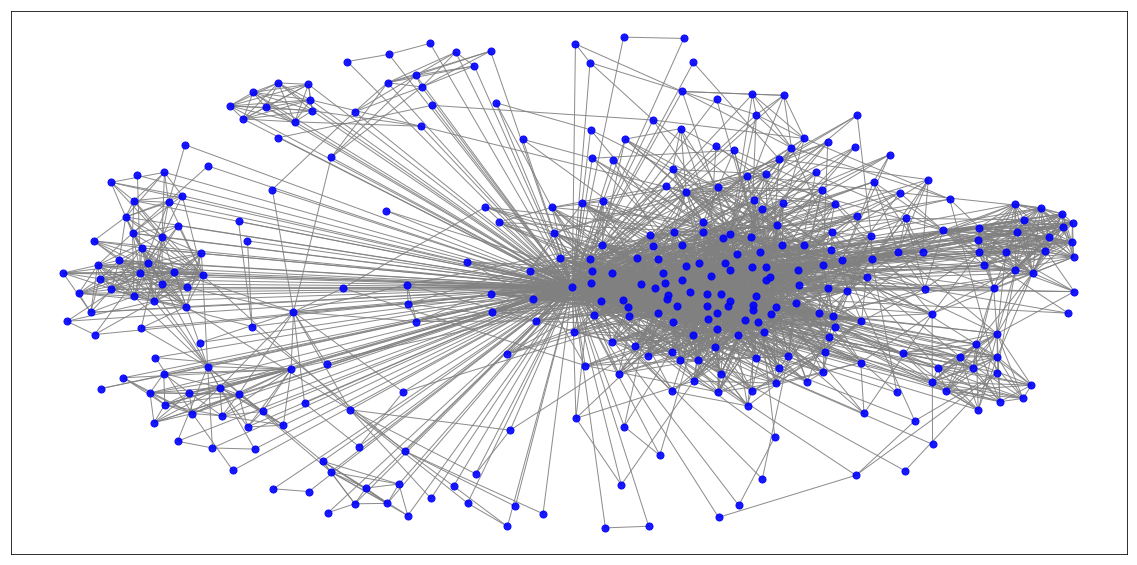

In [36]:
draw_graph(G0)

### Analysis of the Graph 

In [37]:
len(G0.nodes())

334

In [38]:
# by definition of the data the graph is totally connected 
nx.is_connected(G0)

True

In [39]:
# some metrics 
degree_centrality = nx.degree_centrality(G0)
closeness_centralirty = nx.closeness_centrality(G0)
betweenness_centrality = nx.betweenness_centrality(G0)
    
avg_degree = mean(degree_centrality.values())
avg_closeness = mean(closeness_centralirty.values())
avg_betweenness = mean(betweenness_centrality.values())
        
radius = nx.radius(G0)
diameter = nx.diameter(G0)
avg_shortest_path = nx.average_shortest_path_length(G0)
        
smallest_bridge_number = nx.node_connectivity(G0)

In [40]:
dic = {'Node_Id' :list(G0.nodes()) , 'Deg_Cent' : list(degree_centrality.values()) , 'Clo_Cent' : list(closeness_centralirty.values()) , 'Bet_Cent' : list(betweenness_centrality.values())}

In [155]:
community_details = pd.DataFrame(dic)

In [156]:
community_details.head(20)

Node_Id  Deg_Cent  Clo_Cent  Bet_Cent
0       236  0.111111  0.529412  0.001182
1       186  0.132132  0.535370  0.001190
2       122  0.189189  0.552239  0.003782
3       285  0.141141  0.537964  0.002228
4        24  0.048048  0.512308  0.000020
5       346  0.081081  0.521127  0.000816
6       271  0.219219  0.561551  0.004054
7       304  0.165165  0.545008  0.002860
8       176  0.042042  0.510736  0.000047
9         9  0.171171  0.546798  0.002426
10      130  0.048048  0.512308  0.000373
11      329  0.090090  0.523585  0.002005
12      204  0.066066  0.517081  0.000402
13      213  0.117117  0.531100  0.002197
14      252  0.195195  0.554077  0.002932
15      332  0.129129  0.534510  0.001761
16       82  0.102102  0.526899  0.001085
17       65  0.036036  0.509174  0.000102
18      276  0.054054  0.513889  0.000068
19       26  0.204204  0.556856  0.002854

In [157]:
community_details.describe()

Node_Id    Deg_Cent    Clo_Cent    Bet_Cent
count  334.000000  334.000000  334.000000  334.000000
mean   175.167665    0.051285    0.514174    0.002858
std     99.591397    0.069865    0.029585    0.044239
min      0.000000    0.006006    0.501506    0.000000
25%     90.250000    0.018018    0.504545    0.000006
50%    174.500000    0.033033    0.508397    0.000055
75%    260.750000    0.060060    0.515480    0.000308
max    347.000000    1.000000    1.000000    0.808695

In [158]:
radius

1

In [159]:
diameter

2

In [160]:
avg_shortest_path

1.9487151822481164

In [161]:
smallest_bridge_number

1

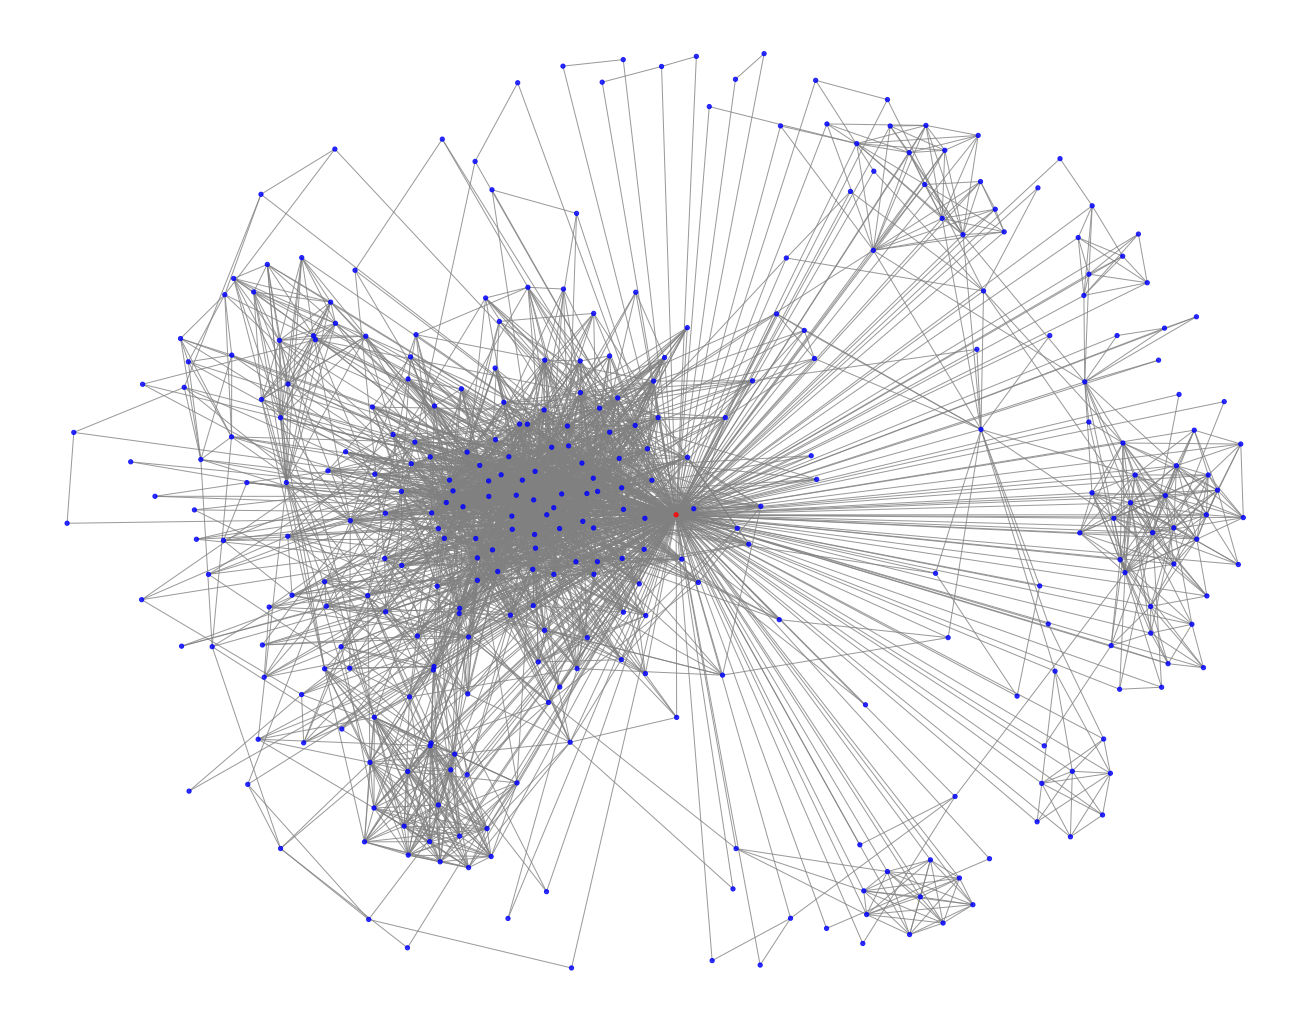

In [162]:
ego_list=[0]
color_nodes (G0,ego_list)

### Finding influencers in the Graph 

In [163]:
List_degree_centrality = top_percent_degree_centrality(G0, per = 0.3)
List_closeness_centrality = top_percent_closeness_centrality(G0 , per = 0.3)
List_betweenness_centrality = top_percent_betweenness_centrality(G0 , per = 0.3)
List_centrality = [x for x in List_degree_centrality if x in List_closeness_centrality and x in List_betweenness_centrality]

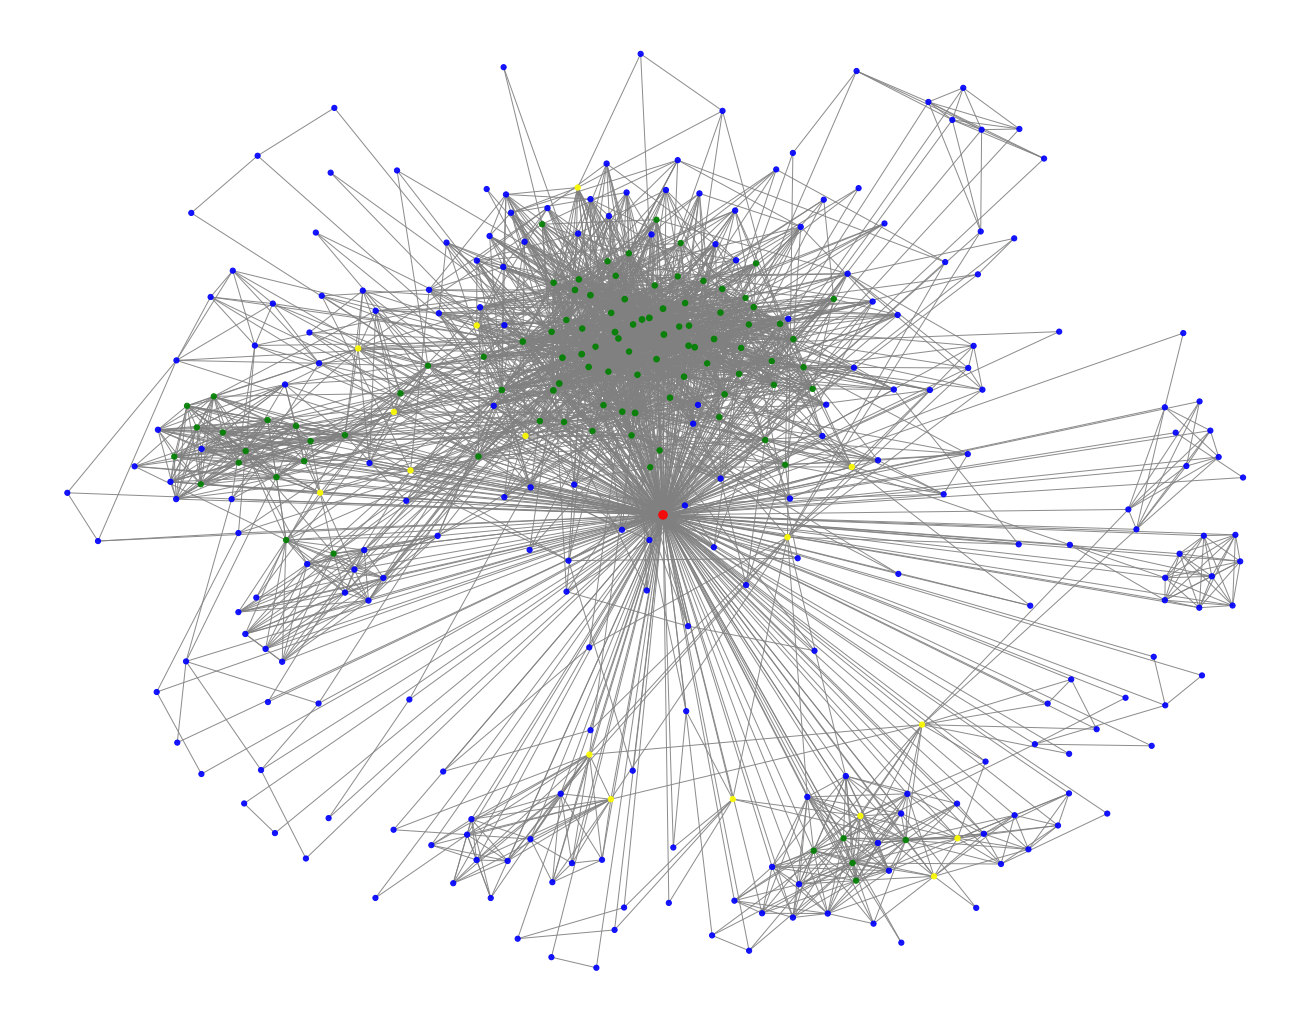

In [164]:
# red : ego center 
# green : degree_centrality
# black : closeness_centrality 
# yellow : betweeness_centrality 

color_quadriple_list_of_nodes_in_graph_centrality (ego_list , List_degree_centrality , List_closeness_centrality , List_betweenness_centrality  , G0 , degree_centrality)

### Extracting Circles File 

In [165]:
c_0 = open(circles, "r")
list_of_circles = read_circles(c_0)

In [166]:
[len(list) for list in list_of_circles ]

[20,
 1,
 9,
 3,
 17,
 1,
 20,
 2,
 1,
 10,
 4,
 30,
 1,
 5,
 2,
 133,
 32,
 9,
 1,
 13,
 6,
 1,
 1,
 3]

### Extracting Features

In [167]:
fe_0 = open(feat, "r")

In [168]:
features= read_feat(fe_0)

In [169]:
len(features)

347

In [170]:
egfe_0 = open(egofeat, "r")

In [171]:
egfeatures= read_eg_feat(egfe_0)

In [172]:
egmatrix=np.array(egfeatures)

In [173]:
egmatrix.shape

(1, 224)

In [174]:
matrix = np.array(features)

In [175]:
matrix.shape

(347, 224)

In [176]:
matrix= np.concatenate((egmatrix, matrix), axis=0)

#### 

#### 

#### 

#### 

In [227]:
df = pd.DataFrame(matrix)

In [228]:
len(list_of_circles)

24

### Focusing on one circle to find out the most important features in the determinstaion of this circle 

#### We can make the same analysis on different circles 

In [229]:
[len(x) for x in list_of_circles]

[20,
 1,
 9,
 3,
 17,
 1,
 20,
 2,
 1,
 10,
 4,
 30,
 1,
 5,
 2,
 133,
 32,
 9,
 1,
 13,
 6,
 1,
 1,
 3]

In [230]:
# choose which circle 
k = 15
Circle = 'Circle_'+str(k)

#### I will take the biggest circle of 133 friend 

#### I will add the feature circle_15 that indicates if one node is in that circle or not  

In [231]:
list = [1]
for i in range(len(features)) : 
    if i in list_of_circles[k] : 
        list.append(1)
    else : 
        list.append(0)

In [232]:
y=pd.DataFrame(list)

### Studying Correlation between the cluster and each feature 

In [233]:
df[Circle]=y

In [234]:
df.head()

0  1  2  3  4  5  6  7  8  9  ...  215  216  217  218  219  220  221  222  \
0  0  0  0  0  0  0  0  0  0  1  ...    0    0    0    0    1    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  1  0  0  ...    0    0    1    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   223  Circle_15  
0    0          1  
1    0          0  
2    0          1  
3    0          0  
4    0          1  

[5 rows x 225 columns]

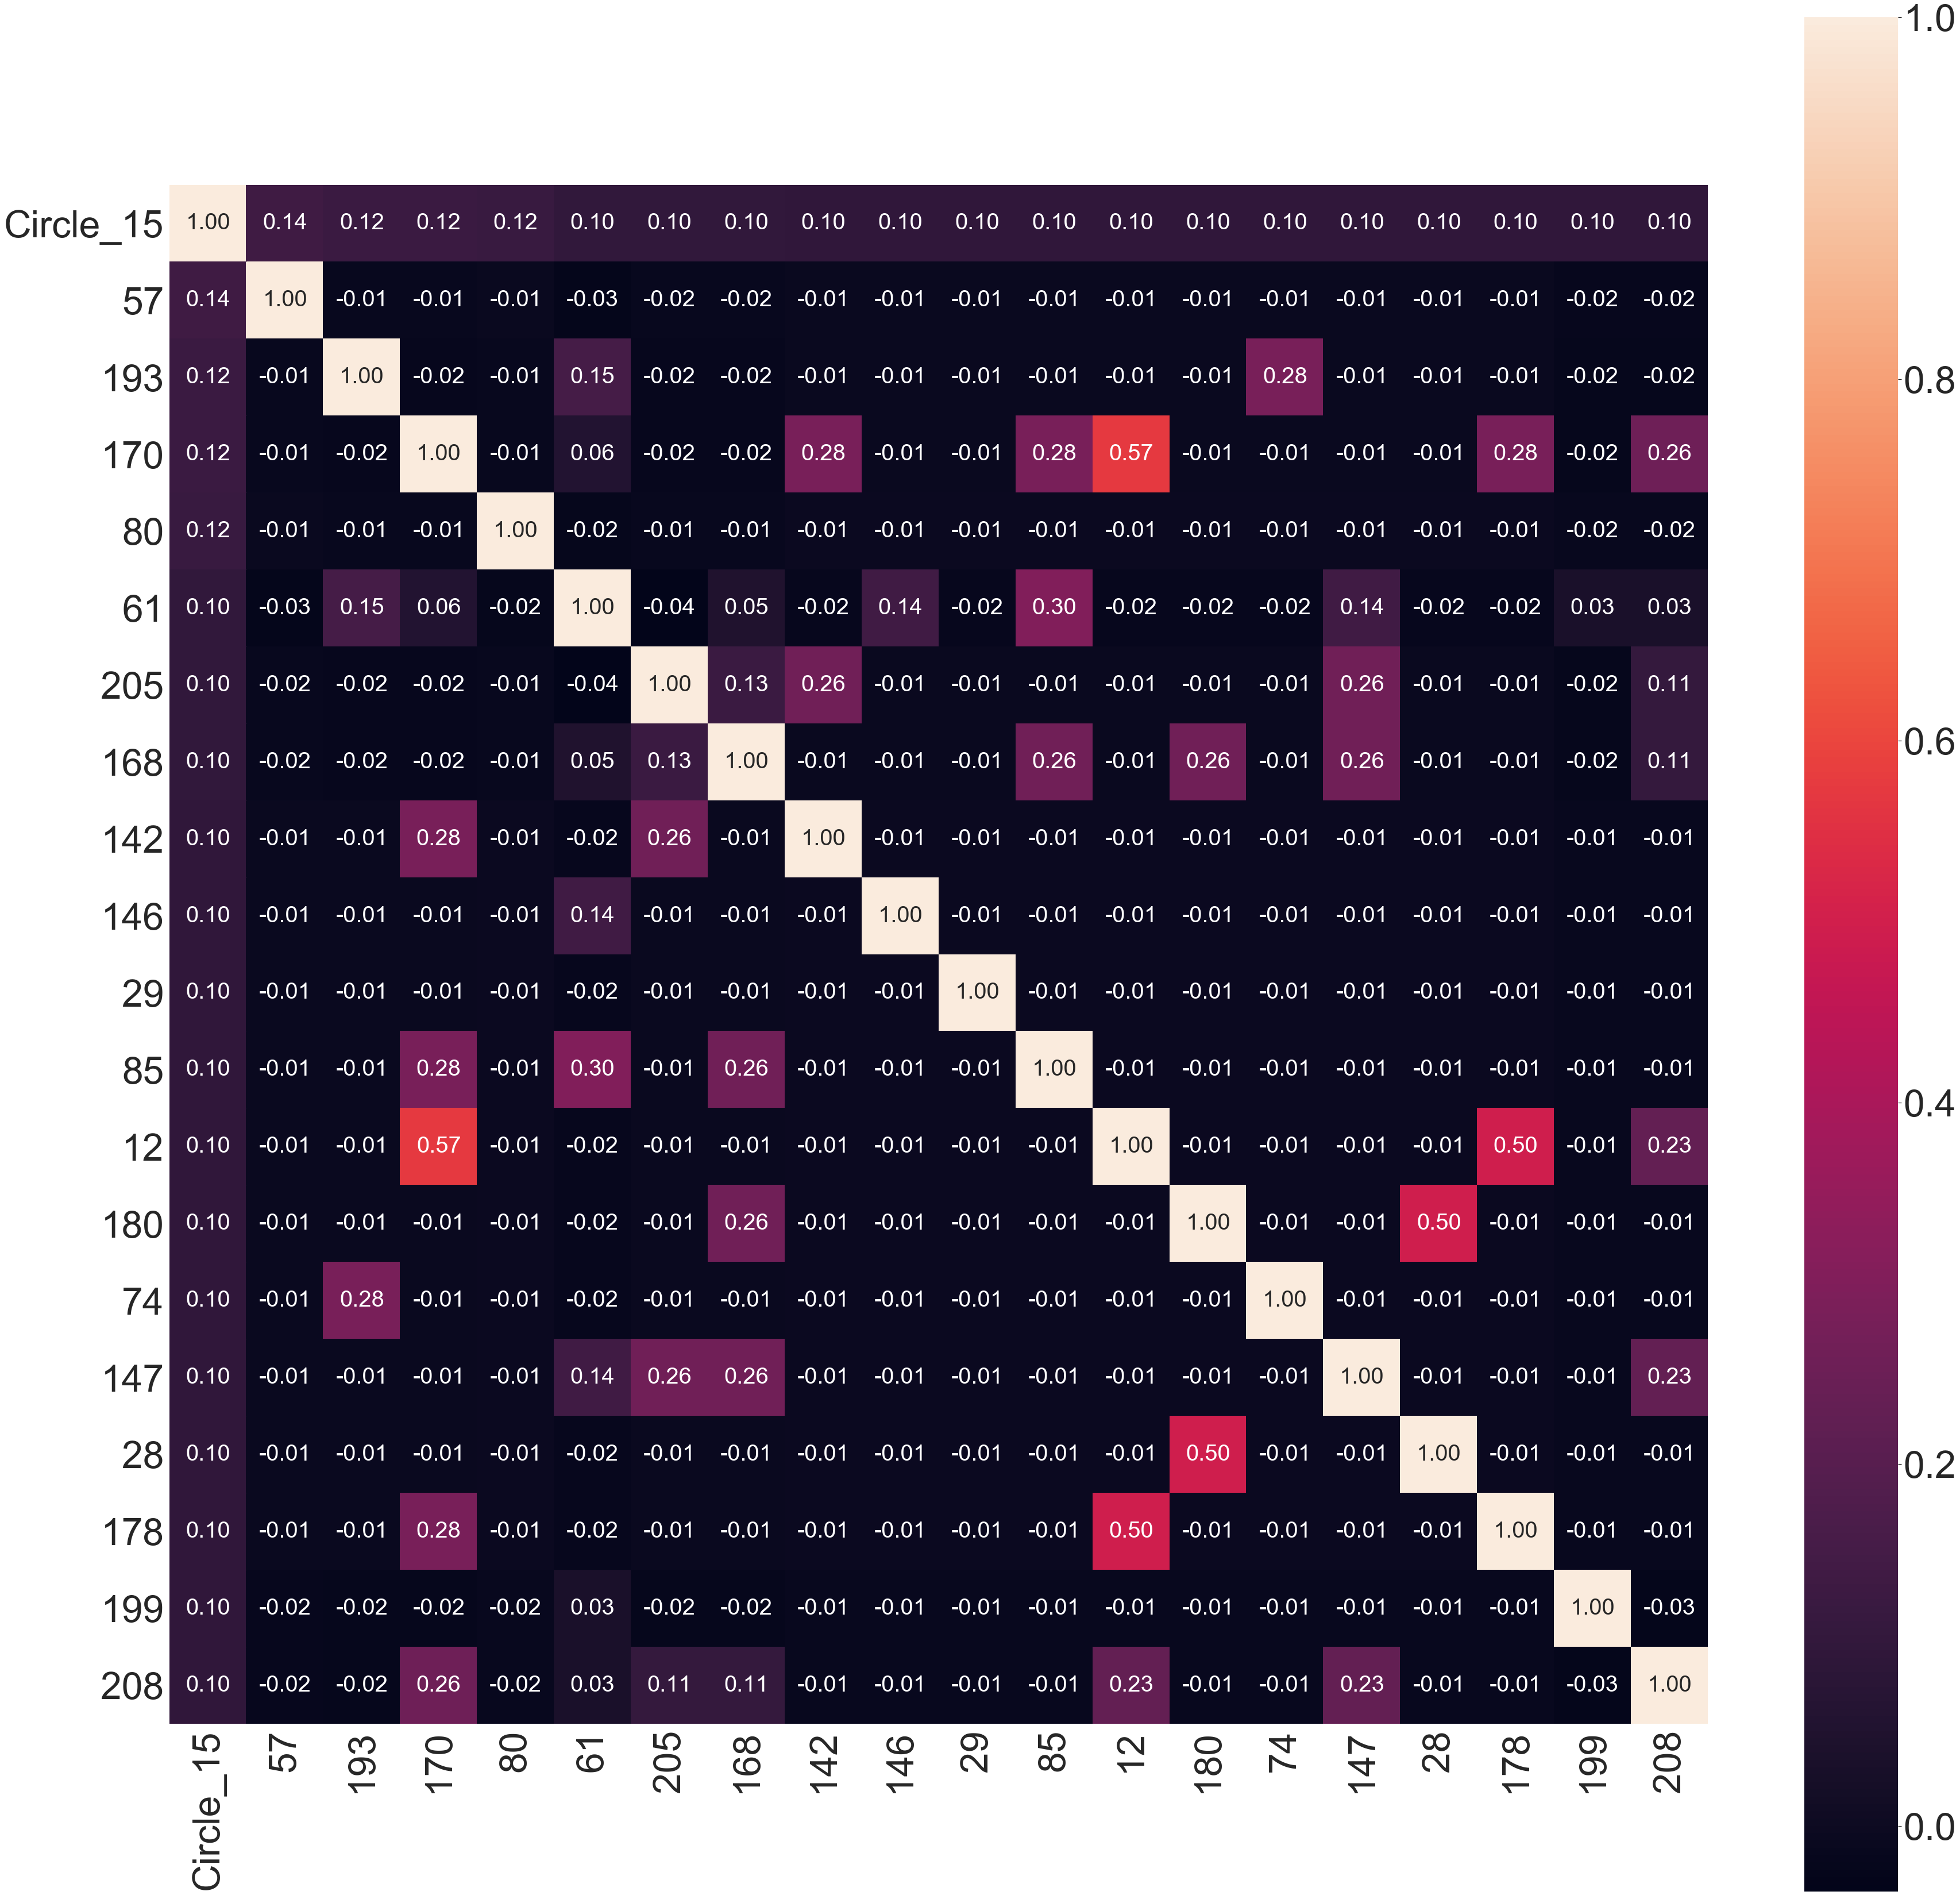

In [235]:
#correlation matrix
corrmat = df.corr()

#saleprice correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, Circle)[Circle].index
f, ax = plt.subplots(figsize=(60,60))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=6)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 40}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [186]:
df = df[cols]

# Model_Focusing_Features_Only

In [187]:
df.drop(Circle, axis = 1,inplace = True)

In [188]:
train=df

In [333]:
df;

In [332]:
y;

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.4, random_state=42)

## Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

## Analysis of the Model 

In [194]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[80, 10],
       [36, 14]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

<Figure size 2160x2160 with 0 Axes>

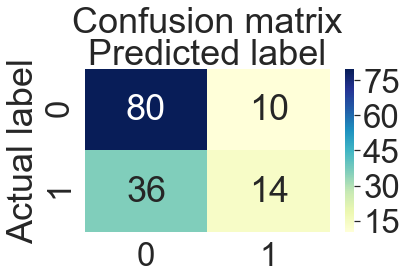

In [195]:
fig= plt.figure(figsize=(30,30))
sns.set(font_scale=3)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [236]:
print("Accuracy = (TP+TN)/(TP+TN+FP+FN)  :",metrics.accuracy_score(y_test, y_pred))
print("Precision = (TP) / (TP+FP)        :",metrics.precision_score(y_test, y_pred))
print("Recall = (TP) / (TP+FN)           :",metrics.recall_score(y_test, y_pred))

Accuracy = (TP+TN)/(TP+TN+FP+FN)  : 0.6714285714285714
Precision = (TP) / (TP+FP)        : 0.5833333333333334
Recall = (TP) / (TP+FN)           : 0.28


## Model on the whole clusters ( circles )

In [302]:
df = pd.DataFrame(matrix)

In [303]:
l=[]
for list in list_of_circles : 
    for elt in list : 
        l.append(elt)

In [304]:
# Figure out if someone is in two or more circles 
k=0
for i in range(len(l)) : 
    for j in range(i+1,len(l)):
        if l[i]==l[j] : 
            k=k+1
            print('This node is in two or more : ',i)
print('\n')
print('We have ',k,' nodes that exists in two or more clusters at the same time')

This node is in two or more :  2
This node is in two or more :  4
This node is in two or more :  9
This node is in two or more :  16
This node is in two or more :  20
This node is in two or more :  33
This node is in two or more :  37
This node is in two or more :  38
This node is in two or more :  42
This node is in two or more :  45
This node is in two or more :  46
This node is in two or more :  49
This node is in two or more :  50
This node is in two or more :  53
This node is in two or more :  54
This node is in two or more :  56
This node is in two or more :  57
This node is in two or more :  58
This node is in two or more :  61
This node is in two or more :  63
This node is in two or more :  65
This node is in two or more :  68
This node is in two or more :  69
This node is in two or more :  70
This node is in two or more :  73
This node is in two or more :  79
This node is in two or more :  114
This node is in two or more :  128
This node is in two or more :  172
This node is i

In [305]:
# len(l) = number of people in the circles / and to consider the number of nodes that repeated 
len(l)-k

286

In [306]:
print('So we only have ',len(l)-k ,' node that is in a circle ')

So we only have  286  node that is in a circle 


#### So we can define nodes that are not in any circle as a cluster themselves 

#### For instance I will suppose that each node can only be in one circle of friend except the ego node 

In [307]:
# adding the circle of each node 
list = [1] # I will suppose the ego_node is only in the cluster_0
for i in range(len(features)) : 
    boole = True  
    k = 1 
    for liste in list_of_circles : 
        if i in liste : 
            if boole :
                list.append(k)
                boole = False
        k=k+1
    if boole : 
        list.append(len(list_of_circles)+1)

In [308]:
len(list)

348

In [309]:
len(features) + 1 # nodes in feature file + node 0

348

#### I will add the feature #Circle# that indicates the circle of a node

In [310]:
y=pd.DataFrame(list)

### Studying Correlation between the cluster and each feature 

In [311]:
df['Circle']=y

In [312]:
df.head()

0  1  2  3  4  5  6  7  8  9  ...  215  216  217  218  219  220  221  222  \
0  0  0  0  0  0  0  0  0  0  1  ...    0    0    0    0    1    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  1  0  0  ...    0    0    1    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   223  Circle  
0    0       1  
1    0      25  
2    0      16  
3    0      11  
4    0      16  

[5 rows x 225 columns]

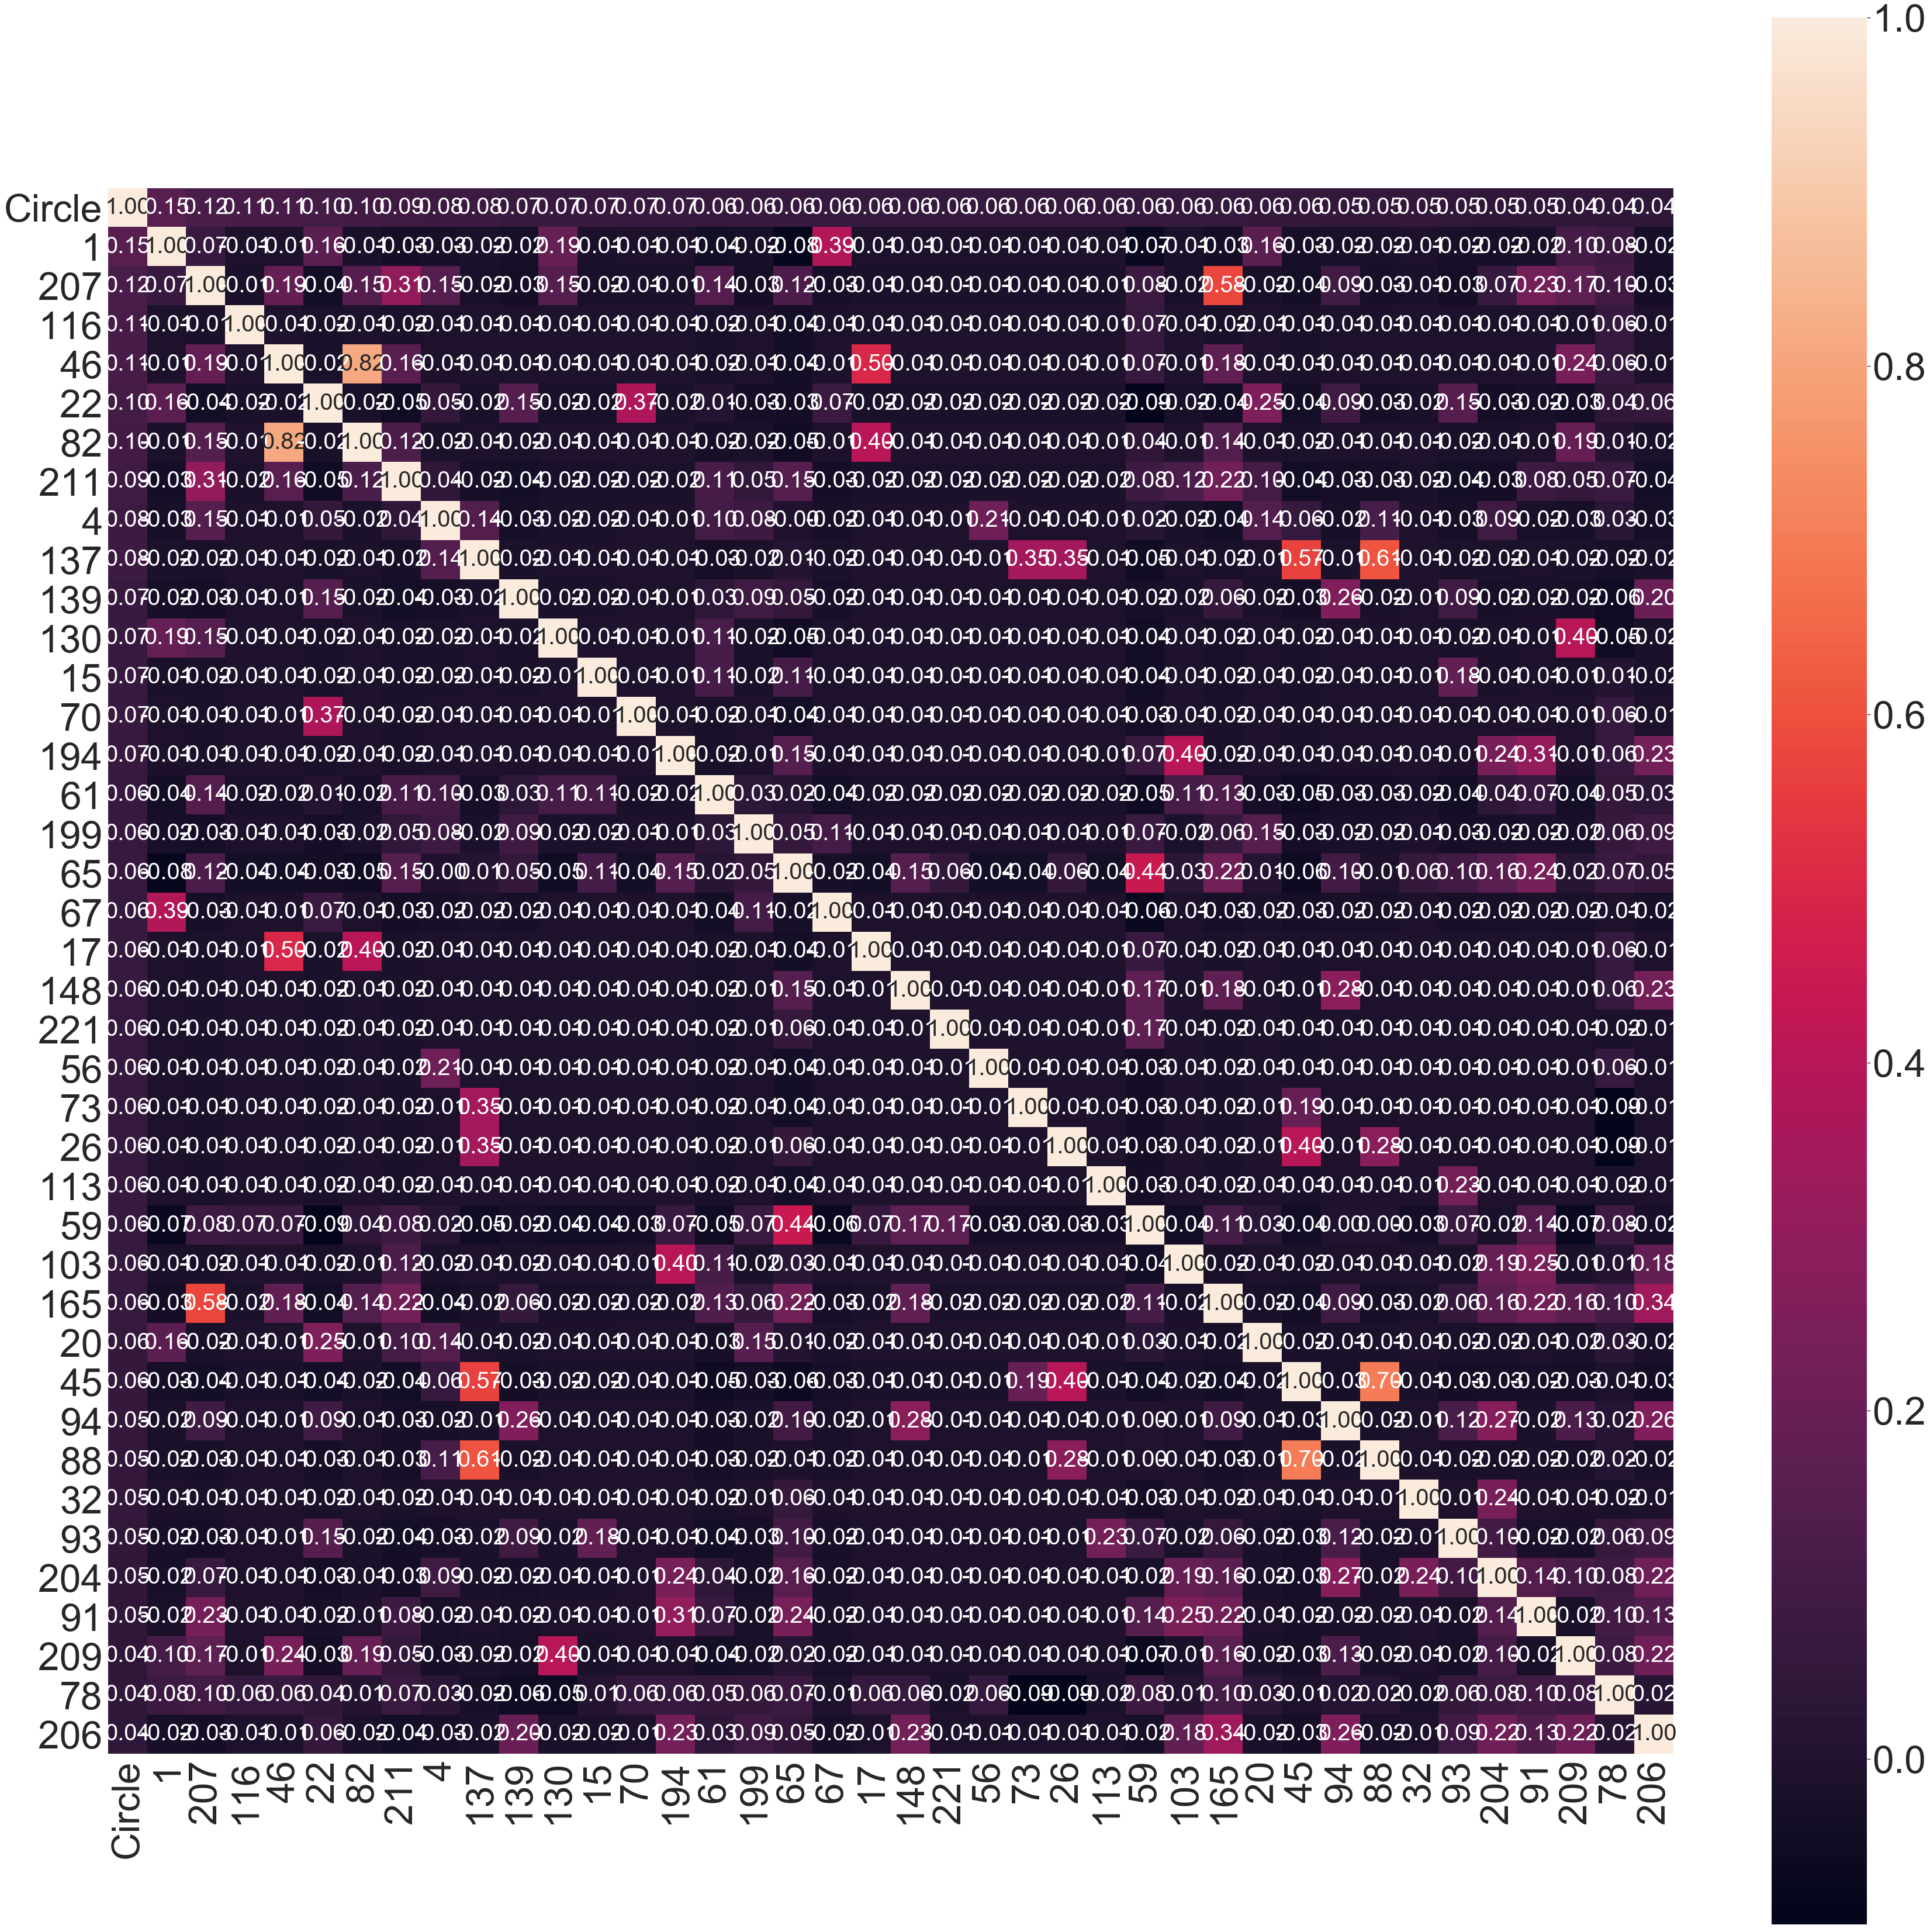

In [313]:
#correlation matrix
corrmat = df.corr()

#saleprice correlation matrix
k = 40 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Circle')['Circle'].index
f, ax = plt.subplots(figsize=(60,60))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=6)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 40}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [314]:
df = df[cols]

## Using K-Means

In [315]:
df.head()

Circle  1  207  116  46  22  82  211  4  137  ...  45  94  88  32  93  204  \
0       1  0    0    0   0   0   0    0  0    0  ...   0   0   0   0   0    0   
1      25  0    0    0   0   0   0    0  0    0  ...   0   0   0   0   0    0   
2      16  0    0    0   0   0   0    0  0    0  ...   0   0   0   0   0    0   
3      11  0    0    0   0   0   0    0  0    0  ...   0   0   0   0   0    0   
4      16  0    0    0   0   0   0    0  0    0  ...   0   0   0   0   0    0   

   91  209  78  206  
0   0    0   1    1  
1   0    0   0    0  
2   0    0   1    0  
3   0    0   1    0  
4   0    0   1    0  

[5 rows x 40 columns]

In [316]:
df.drop('Circle', axis = 1,inplace = True)

In [317]:
from sklearn.cluster import KMeans

In [318]:
kmeans = KMeans(n_clusters=26, random_state=0).fit(df)

In [319]:
pred = kmeans.labels_

In [320]:
kmeans.cluster_centers_;

In [321]:
predictions = pd.DataFrame(pred)

In [322]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y)

0.028735632183908046

### Other 

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5, random_state=42)

In [326]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [327]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
...                              random_state=0)

In [328]:
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [329]:
predi=clf.predict(X_test)

In [331]:
from sklearn.metrics import accuracy_score
accuracy_score(predi, y_test)

0.3390804597701149